In [1]:
import json
import seaborn as sns
import pandas as pd

## Speech-to-Text

In [2]:
f = open('wav2vec2-rbg-badaga-stt/trainer_state.json')
data = json.load(f)
f.close()

In [3]:
step = list()
wer = list()
eval_loss = list()
for item in data["log_history"]:
    if 'eval_wer' in item:
        step.append(item['step'])
        wer.append(item['eval_wer'])
        eval_loss.append(item["eval_loss"])

In [4]:
df = pd.DataFrame.from_dict({"Step": step, "WER": wer,
                            "Evaluation Loss": eval_loss})

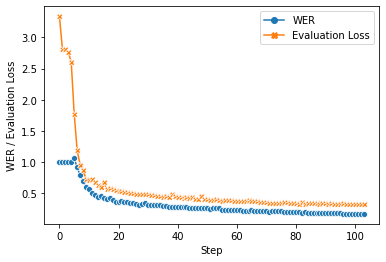

In [5]:
ax = sns.lineplot(data=df[["WER", "Evaluation Loss"]], markers=True, dashes=False)
ax.set(xlabel="Step", ylabel = "WER / Evaluation Loss")
a2 = ax.get_figure()
a2.savefig("figures/stt_loss.png", dpi=300)

## Gender Identification

In [6]:
f = open('wav2vec2-rbg-badaga-gender/trainer_state.json')
data = json.load(f)
f.close()

In [7]:
step = list()
acc = list()
eval_loss = list()
for item in data["log_history"]:
    if 'eval_accuracy' in item:
        step.append(item['step'])
        acc.append(item['eval_accuracy'])
        eval_loss.append(item["eval_loss"])

In [8]:
df = pd.DataFrame.from_dict({"Step": step, "Accuracy": acc,
                            "Evaluation Loss": eval_loss})

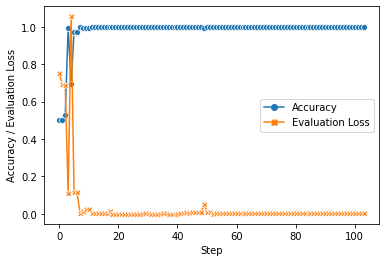

In [9]:
ax = sns.lineplot(data=df[["Accuracy", "Evaluation Loss"]], markers=True, dashes=False)
ax.set(xlabel="Step", ylabel = "Accuracy / Evaluation Loss")
a2 = ax.get_figure()
a2.savefig("figures/gender_loss.png", dpi=300)

## Speaker Identification

In [10]:
f = open('wav2vec2-rbg-badaga-speaker/trainer_state.json')
data = json.load(f)
f.close()

In [11]:
step = list()
acc = list()
eval_loss = list()
for item in data["log_history"]:
    if 'eval_accuracy' in item:
        step.append(item['step'])
        acc.append(item['eval_accuracy'])
        eval_loss.append(item["eval_loss"])

In [12]:
df = pd.DataFrame.from_dict({"Step": step, "Accuracy": acc,
                            "Evaluation Loss": eval_loss})

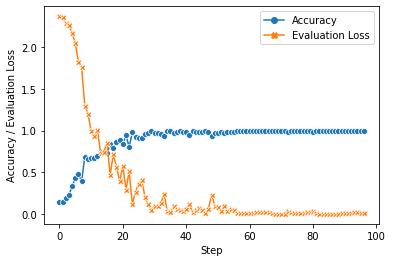

In [13]:
ax = sns.lineplot(data=df[["Accuracy", "Evaluation Loss"]], markers=True, dashes=False)
ax.set(xlabel="Step", ylabel = "Accuracy / Evaluation Loss")
a2 = ax.get_figure()
a2.savefig("figures/speaker_loss.png", dpi=300)

## Machine Translation

#### English to Badaga

In [14]:
f = open('opus-mt-rbg-en-to-bad/trainer_state.json')
data = json.load(f)
f.close()

In [15]:
step = list()
blue = list()
eval_loss = list()
for item in data["log_history"]:
    if 'eval_bleu' in item:
        step.append(item['epoch'])
        blue.append(item['eval_bleu'])
        eval_loss.append(item["eval_loss"])

In [16]:
df = pd.DataFrame.from_dict({"Epoch": step, "Eng-to-Badaga BLUE": blue,
                            "Evaluation Loss Eng-to-Badaga": eval_loss})

In [17]:
f = open('opus-mt-rbg-bad-to-en/trainer_state.json')
data = json.load(f)
f.close()

In [18]:
step = list()
blue = list()
eval_loss = list()
for item in data["log_history"]:
    if 'eval_bleu' in item:
        step.append(item['epoch'])
        blue.append(item['eval_bleu'])
        eval_loss.append(item["eval_loss"])

In [19]:
df["Badaga-to-Eng BLUE"] = blue
df["Evaluation Loss Badaga-to-Eng"] = eval_loss

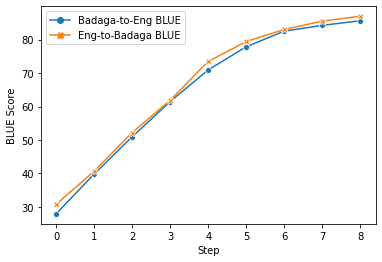

In [20]:
ax = sns.lineplot(data=df[["Badaga-to-Eng BLUE", "Eng-to-Badaga BLUE"]], markers=True, dashes=False)
ax.set(xlabel="Step", ylabel = "BLUE Score")
a2 = ax.get_figure()
a2.savefig("figures/translation_loss.png", dpi=300)

## Text-to-Speech

In [21]:
m_df = pd.read_csv("files/male.csv")
f_df = pd.read_csv("files/female.csv")

In [22]:
df = pd.DataFrame.from_dict({"Evaluation Loss - Female": list(f_df["Value"]),
                            "Evaluation Loss - Male": list(m_df["Value"])})

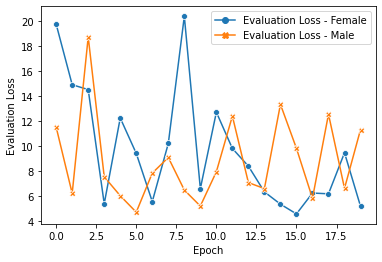

In [23]:
ax = sns.lineplot(data=df[["Evaluation Loss - Female", "Evaluation Loss - Male"]], markers=True, dashes=False)
ax.set(xlabel="Epoch", ylabel = "Evaluation Loss")
a2 = ax.get_figure()
a2.savefig("figures/tts_loss.png", dpi=300)